In [1]:
from helper import Helper
import statsmodels.api as sm

header, x_train = Helper.load_csv_to_ndarray('data/hw2p3_xtrain.csv')
header, y_train = Helper.load_csv_to_ndarray('data/hw2p3_ytrain.csv')
header, x_test = Helper.load_csv_to_ndarray('data/hw2p3_xtest.csv')

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)

In [2]:
from copy import copy
from sklearn.preprocessing import PolynomialFeatures

def create_linear_regression(x_train, y_train, degree):
    if degree == 1:
        return sm.OLS(y_train, sm.add_constant(x_train)).fit()
        
    polynomial_features= PolynomialFeatures(degree=degree)
    # e.g. if degree = 2 and x = (6.0)
    # then x would be -> (6.0, 36.0)
    x_train_modified = polynomial_features.fit_transform(x_train.reshape(-1, 1))
        
    # add intercept so that x = (1.0, 6.0, 36.0)
    x_train_modified = sm.add_constant(x_train_modified)
    
    return sm.OLS(y_train, x_train_modified).fit()

In [3]:
affine_linear_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_linear_functions.append(create_linear_regression(sub_x_train, sub_y_train, 1))
    
y_test_plots = []
x_test_with_bias = sm.add_constant(x_test)

for i in range(0, 49):
    y_test_plots.append(affine_linear_functions[i].predict(x_test_with_bias))

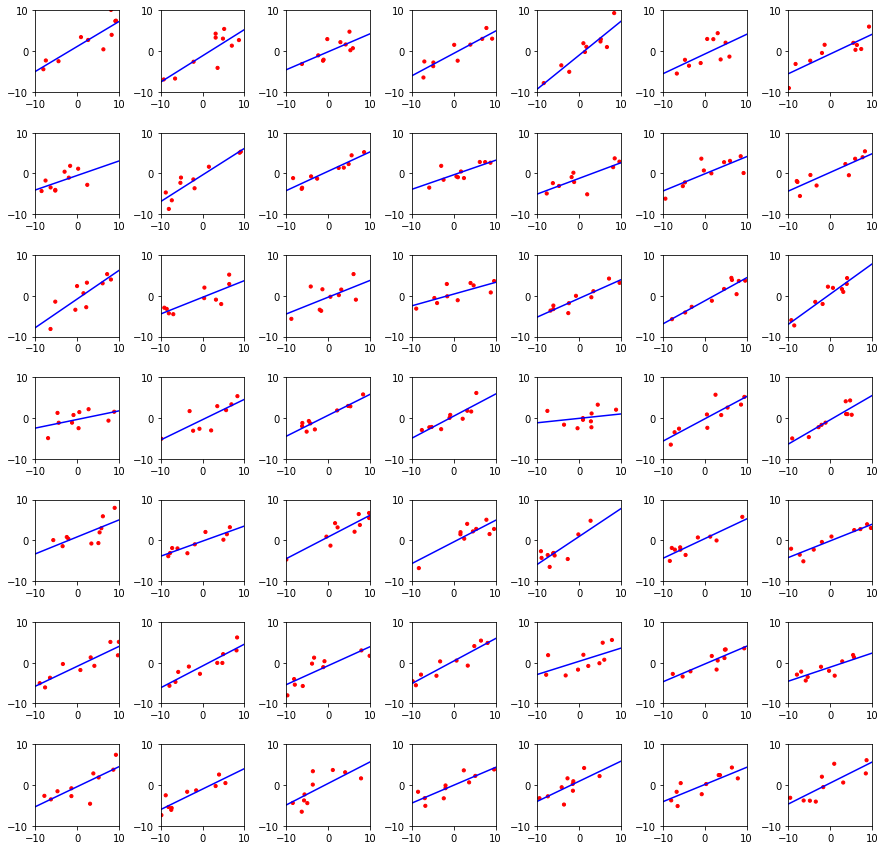

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
i = 0
for row in ax:
    for col in row:
        sub_x_train = x_train[:, i]
        sub_y_train = y_train[:, i]
        
        col.set_xlim([-10, 10])
        col.set_xticks([-10, 0, 10])
        
        col.set_ylim([-10, 10])
        col.set_yticks([-10, 0, 10])
        
        col.plot(x_test, y_test_plots[i], color='blue')
        col.scatter(sub_x_train, sub_y_train, color='red', s=np.full((len(sub_x_train),), 10))
        
        i = i + 1

plt.show()

In [5]:
affine_quadratic_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_quadratic_functions.append(create_linear_regression(sub_x_train, sub_y_train, 2))
    
y_test_plots = []

polynomial_features= PolynomialFeatures(degree=2)
x_test_modified = polynomial_features.fit_transform(x_test.reshape(-1, 1))
x_test_with_bias = sm.add_constant(x_test_modified)

for i in range(0, 49):
    y_test_plots.append(affine_quadratic_functions[i].predict(x_test_with_bias))

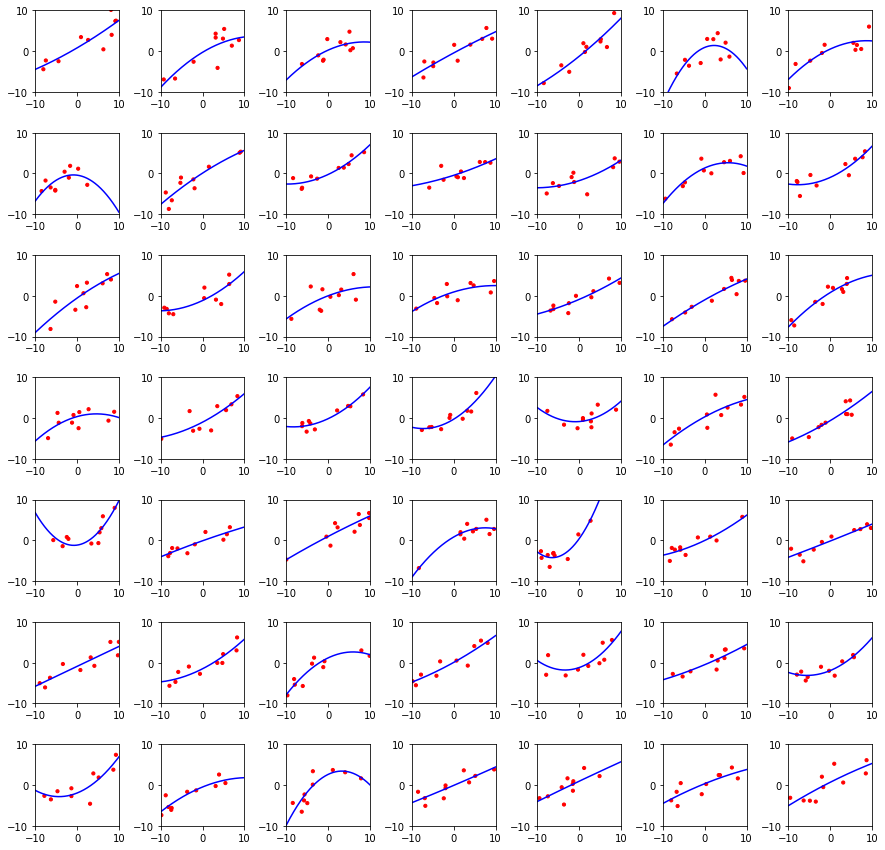

In [6]:
fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
i = 0
for row in ax:
    for col in row:
        sub_x_train = x_train[:, i]
        sub_y_train = y_train[:, i]
        
        col.set_xlim([-10, 10])
        col.set_xticks([-10, 0, 10])
        
        col.set_ylim([-10, 10])
        col.set_yticks([-10, 0, 10])
        
        col.plot(x_test, y_test_plots[i], color='blue')
        col.scatter(sub_x_train, sub_y_train, color='red', s=np.full((len(sub_x_train),), 10))
        
        i = i + 1

plt.show()

In [7]:
affine_cubic_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_cubic_functions.append(create_linear_regression(sub_x_train, sub_y_train, 3))
    
y_test_plots = []

polynomial_features= PolynomialFeatures(degree=3)
x_test_modified = polynomial_features.fit_transform(x_test.reshape(-1, 1))
x_test_with_bias = sm.add_constant(x_test_modified)

for i in range(0, 49):
    y_test_plots.append(affine_cubic_functions[i].predict(x_test_with_bias))

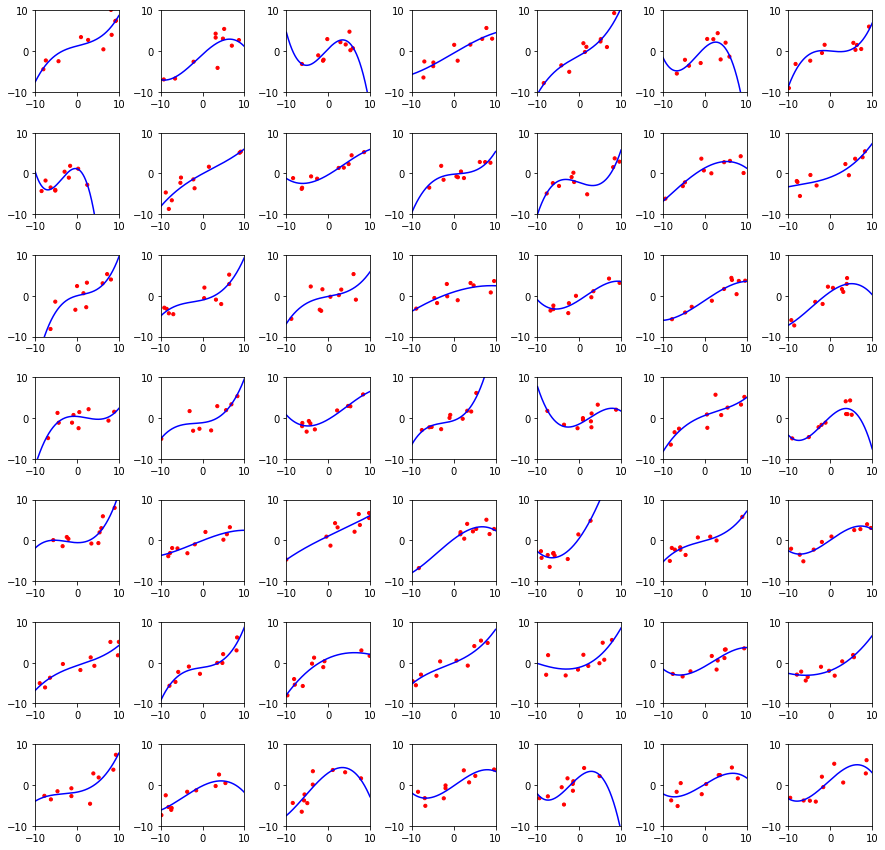

In [8]:
fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(15, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
i = 0
for row in ax:
    for col in row:
        sub_x_train = x_train[:, i]
        sub_y_train = y_train[:, i]
        
        col.set_xlim([-10, 10])
        col.set_xticks([-10, 0, 10])
        
        col.set_ylim([-10, 10])
        col.set_yticks([-10, 0, 10])
        
        col.plot(x_test, y_test_plots[i], color='blue')
        col.scatter(sub_x_train, sub_y_train, color='red', s=np.full((len(sub_x_train),), 10))
        
        i = i + 1

plt.show()